# 1 - Estimate when US Installs will reach EoL


Historical installations for U.S. Utility and non-Residential sector was calculated from
1. L. Sherwood, “U.S. Solar Market Trends 2008,” Interstate Renewable Energy Council, Jul. 2009. Accessed: Sep. 15, 2021. [Online]. Available: https://irecusa.org/wp-content/uploads/2021/07/Solar-Market-Trends-2008.pdf
2. All Sherwood reports 2009-2014 for 1999 through 2009
3. Wood Mackenzie Data from 2010 forward.
4. “U.S. Solar Market Insight Report: 2012 Year in Review Full Report,” Greentech Media Inc. & SEIA, 2013 as a sanity check.
The calculations to select for only these 2 sectors and weight for c-Si can be found in Supporting Materials folder, files "Calculations-Installs-Subset-CommUtility.xlsx", "Installs-SubsetCommUtility.xlsx", and "Installs-SubsetCommUtility.csv".

These installations where then put into a module file. Installations after 2020 are set to 0, manufacturing efficiency is set to 100, and all circular EoL pathways are set to 0, sending all EoL material to the landfill. All lifetime and reliability, module efficiencies, and module degradation rates are taken from PV ICE baseline. The purpose of this calculation is to estimate when currently installed PV modules will come out of the field and need to be managed at EoL.


This analysis conducted for Taylor Curtis

In [1]:
import os
from pathlib import Path
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP


### Add Scenarios and Materials


In [2]:
cwd=os.getcwd()
print(os.getcwd())

C:\Users\hmirletz\Documents\GitHub\PV_ICE\docs\tutorials


In [3]:
MATERIALS = ['glass','aluminium_frames','silver','silicon', 'copper', 'encapsulant']
MATERIAL = MATERIALS[0]
moduleFile = r'..\baselines\baseline_modules_US_HistoryUtilCommOnly.csv'

In [4]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='USHistory', file=moduleFile)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['USHistory'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP


### Set All Material Virgin, MFG, and circularity to 0

The effective this will be to neglect all inefficiencies in the extraction and manufacturing process, looking at just the PV module material coming out of the field, and assuming it all goes to the landfill.

In [12]:
#list of material recycling variables
RecyclingPaths = ['mat_MFG_scrap_recycled', 'mat_MFG_scrap_Recycled_into_HQ', 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_EOL_collected_Recycled', 'mat_EOL_Recycled_into_HQ', 'mat_EoL_Recycled_HQ_into_MFG']
RecyclingYields = ['mat_MFG_scrap_recycling_eff', 'mat_EOL_Recycling_eff']

In [13]:
for mat in range (0, len(MATERIALS)):
    r1.scenario['USHistory'].material[MATERIALS[mat]].materialdata['mat_virgin_eff'] = 100.0
    r1.scenario['USHistory'].material[MATERIALS[mat]].materialdata['mat_MFG_eff'] = 100.0
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['USHistory'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 0.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['USHistory'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 0.0

### Run the Mass Flow Calculations on All Scenarios and Materials

In [14]:
r1.calculateMassFlow()


Working on Scenario:  USHistory
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant


###  Use internal plotting functions to plot results

Pull out the keywords by printing the keys to the module data or the material data:

    print(r1.scenario.keys())
    
    print(r1.scenario['standard'].data.keys())
    
    print(r1.scenario['standard'].material['glass'].materialdata.keys())

In [8]:
#print(r1.scenario.keys())
#print(r1.scenario['USHistory'].data.keys())
print(r1.scenario['USHistory'].material['glass'].materialdata.keys())

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
       'mat_EOL_collected_Recycled', 'mat_EOL_Recycling_eff',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG',
       'mat_MFG_scrap_recycled', 'mat_EoL_Recycled_HQ_into_MFG',
       'mat_MFG_scrap_recycling_eff', 'mat_modules_Collected',
       'mat_modules_NotCollected', 'mat_modules_Recycled',
       'mat_modules_NotRecycled', 'mat_EOL_sento_Recycling',
       'mat_EOL_NotRecycled_Landfilled', 'mat_EOL_Recycled',
       'mat_EOL_Recycled_Losses_Landfilled', 'mat_EOL_Recycled_2_HQ',
       'mat_EOL_Recycled_2_OQ', 'mat_EOL_Recycled_HQ_into_OU',
       'mat_UsedSuccessfullyinModuleManufacturing',
       'mat_EnteringModuleManufacturing', 'mat_LostinModuleManufacturing',
       'mat_Manufacturing_Input', 'mat_MFG_Scrap',
       'mat_MFG_Scrap_Sentto

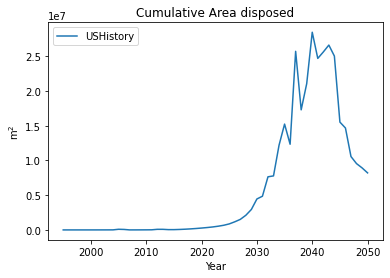

In [15]:
r1.plotScenariosComparison(keyword='Cumulative_Area_disposed')

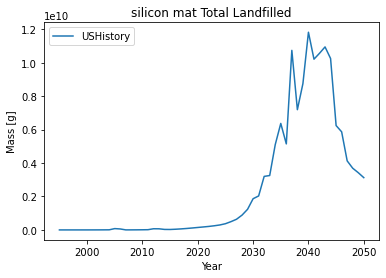

In [16]:
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')

Text(0, 0.5, 'Installed Cap [W]')

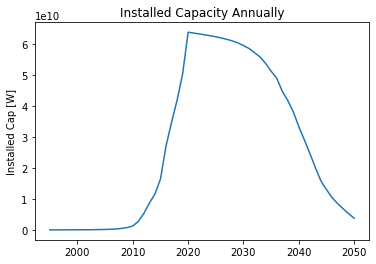

In [11]:
plt.plot(r1.scenario['USHistory'].data['year'], 
         r1.scenario['USHistory'].data['Installed_Capacity_[W]'], label='Installed [W]')

plt.title('Installed Capacity Annually')
plt.ylabel('Installed Cap [W]')

## Pretty Plots

In [29]:
#create a yearly Module Waste Mass
USyearly=pd.DataFrame()
keyword = 'mat_Total_Landfilled'
for mat in range (0, len(MATERIALS)):
    material = MATERIALS[mat]
    foo = r1.scenario['USHistory'].material[material].materialdata[keyword].copy()
    foo = foo.to_frame(name=material)
    USyearly["Waste_"+material] = foo[material]
    
USyearly['Waste_Module'] = USyearly.sum(axis=1)

USyearly.head(10)

,Waste_glass,Waste_aluminium_frames,Waste_silver,Waste_silicon,Waste_copper,Waste_encapsulant,Waste_Module
0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
1,2.678619e+03,1.035013e+03,29.464807,2.840747e+02,1.800032,2.832639e+02,4.312236e+03
2,5.917319e+04,2.284561e+04,650.031174,6.271235e+03,39.764382,6.257565e+03,9.523739e+04
3,3.856363e+05,1.486079e+05,4223.356020,4.080731e+04,259.147611,4.078104e+04,6.203151e+05
4,1.478019e+06,5.686844e+05,16146.275477,1.562048e+05,993.228826,1.563005e+05,2.376348e+06
5,4.182335e+06,1.607253e+06,45604.181592,4.415997e+05,2810.529230,4.422819e+05,6.721885e+06
6,9.729962e+06,3.735129e+06,105938.969965,1.026597e+06,6538.534291,1.028943e+06,1.563311e+07
7,1.971347e+07,7.558967e+06,214355.872346,2.078575e+06,13247.453922,2.084700e+06,3.166332e+07
8,3.593412e+07,1.376014e+07,390211.820304,3.786364e+06,24147.728726,3.800033e+06,5.769501e+07
9,6.001696e+07,2.294312e+07,650743.437552,6.319301e+06,40331.397462,6.346794e+06,9.631725e+07


In [30]:
#add index
USyearly.index = r1.scenario['USHistory'].data['year']

In [85]:
#Convert to metric tonnes
USyearly_mil_tonnes=USyearly/1000000000000

In [88]:
USyearly_mil_tonnes.head()

,Waste_glass,Waste_aluminium_frames,Waste_silver,Waste_silicon,Waste_copper,Waste_encapsulant,Waste_Module
year,,,,,,,
1995,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1996,2.678619e-09,1.035013e-09,2.946481e-11,2.840747e-10,1.800032e-12,2.832639e-10,4.312236e-09
1997,5.917319e-08,2.284561e-08,6.500312e-10,6.271235e-09,3.976438e-11,6.257565e-09,9.523739e-08
1998,3.856363e-07,1.486079e-07,4.223356e-09,4.080731e-08,2.591476e-10,4.078104e-08,6.203151e-07
1999,1.478019e-06,5.686844e-07,1.614628e-08,1.562048e-07,9.932288e-10,1.563005e-07,2.376348e-06


In [89]:
UScum = USyearly_mil_tonnes.copy()
UScum = UScum.cumsum()
UScum

,Waste_glass,Waste_aluminium_frames,Waste_silver,Waste_silicon,Waste_copper,Waste_encapsulant,Waste_Module
year,,,,,,,
1995,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1996,2.678619e-09,1.035013e-09,2.946481e-11,2.840747e-10,1.800032e-12,2.832639e-10,4.312236e-09
1997,6.185181e-08,2.388062e-08,6.794960e-10,6.555310e-09,4.156441e-11,6.540828e-09,9.954963e-08
1998,4.474881e-07,1.724885e-07,4.902852e-09,4.736261e-08,3.007120e-10,4.732187e-08,7.198647e-07
1999,1.925507e-06,7.411729e-07,2.104913e-08,2.035674e-07,1.293941e-09,2.036224e-07,3.096213e-06
2000,6.107842e-06,2.348426e-06,6.665331e-08,6.451671e-07,4.104470e-09,6.459043e-07,9.818098e-06
2001,1.583780e-05,6.083555e-06,1.725923e-07,1.671764e-06,1.064300e-08,1.674848e-06,2.545121e-05
2002,3.555128e-05,1.364252e-05,3.869482e-07,3.750339e-06,2.389046e-08,3.759548e-06,5.711452e-05
2003,7.148540e-05,2.740266e-05,7.771600e-07,7.536703e-06,4.803819e-08,7.559581e-06,1.148095e-04


In [90]:
bottoms = pd.DataFrame(UScum.loc[2050])
bottoms

,2050
Waste_glass,2.831902
Waste_aluminium_frames,0.498903
Waste_silver,0.001763
Waste_silicon,0.139368
Waste_copper,0.002304
Waste_encapsulant,0.287442
Waste_Module,3.761682


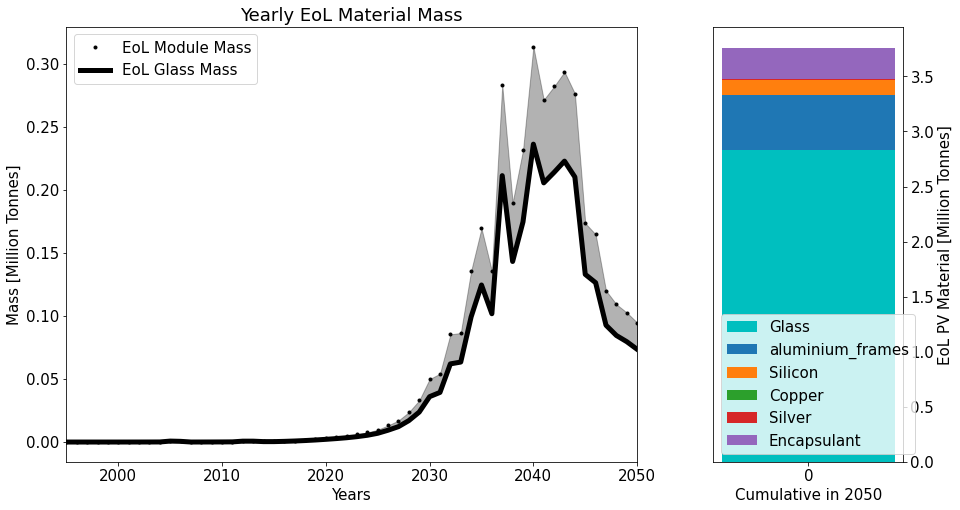

In [94]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
a0.plot(USyearly_mil_tonnes.index, USyearly_mil_tonnes['Waste_Module'], 'k.', linewidth=5, label='EoL Module Mass')
a0.plot(USyearly_mil_tonnes.index, USyearly_mil_tonnes['Waste_glass'], 'k', linewidth=5, label='EoL Glass Mass')
a0.fill_between(USyearly_mil_tonnes.index, USyearly_mil_tonnes['Waste_glass'], USyearly_mil_tonnes['Waste_Module'],
                color='k', alpha=0.3, interpolate=True)

a0.legend()
a0.set_title('Yearly EoL Material Mass')
a0.set_ylabel('Mass [Million Tonnes]')
a0.set_xlim([1995, 2050])
a0.set_xlabel('Years')

########################    
# SUBPLOT 2
########################
## Plot BARS Stuff
ind=np.arange(1)
width=0.35 # width of the bars.

bottoms = pd.DataFrame(UScum.loc[2050])

p0 = a1.bar(ind, UScum.loc[2050]['Waste_glass'], width, color='c')
p1 = a1.bar(ind, UScum.loc[2050]['Waste_aluminium_frames'], width, bottom=bottoms.iloc[0])
p2 = a1.bar(ind, UScum.loc[2050]['Waste_silicon'], width, bottom=(bottoms.iloc[1]+bottoms.iloc[0]))
p3 = a1.bar(ind, UScum.loc[2050]['Waste_copper'], width, bottom=(bottoms.iloc[2]+bottoms.iloc[1]+bottoms.iloc[0]))
p4 = a1.bar(ind, UScum.loc[2050]['Waste_silver'], width, bottom=(bottoms.iloc[3]+bottoms.iloc[2]+bottoms.iloc[1]+bottoms.iloc[0]))
p5 = a1.bar(ind, UScum.loc[2050]['Waste_encapsulant'], width, bottom=(bottoms.iloc[4]+bottoms.iloc[3]+bottoms.iloc[2]+bottoms.iloc[1]+bottoms.iloc[0]))

a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.set_ylabel('EoL PV Material [Million Tonnes]')
a1.set_xlabel('Cumulative in 2050')
a1.set_xticks(ind)
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0], p5[0] ), ('Glass', 'aluminium_frames', 'Silicon','Copper','Silver', 'Encapsulant'))